In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('expC/fcdeveval.csv', header=None)

In [58]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,11.0,11.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,...,-0.166,-0.097,-0.285,0.204,-0.268,-0.197,0.338,-0.029,-0.204,-0.127
1,11.0,3.0,0.0,0.000,0.014,0.873,0.000,0.011,0.001,0.0,...,-0.180,0.001,-0.111,0.295,-0.103,-0.280,0.161,0.236,-0.157,0.515
2,11.0,11.0,0.0,0.000,0.000,0.001,0.000,0.000,0.000,0.0,...,-0.050,-0.020,-0.146,0.184,-0.337,-0.008,0.449,-0.214,-0.303,-0.022
3,11.0,11.0,0.0,0.002,0.000,0.000,0.000,0.310,0.000,0.0,...,-0.158,0.269,0.029,-0.017,-0.216,-0.019,0.074,-0.138,0.112,0.012
4,11.0,11.0,0.0,0.001,0.000,0.001,0.001,0.088,0.000,0.0,...,-0.109,-0.150,-0.286,-0.080,-0.310,-0.155,0.206,-0.256,0.162,-0.092


In [59]:
(df[0]==df[1]).mean()

0.71744930629669157

In [60]:
df[0].value_counts()

1.0     1171
3.0      252
6.0      250
8.0      244
7.0      237
0.0      234
9.0      233
10.0     231
4.0      228
11.0     226
2.0      223
5.0      219
Name: 0, dtype: int64

In [61]:
df[1].value_counts()

9.0     540
1.0     489
8.0     458
2.0     453
11.0    346
10.0    256
6.0     251
3.0     247
5.0     235
7.0     233
4.0     227
0.0      13
Name: 1, dtype: int64

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [64]:
cm = confusion_matrix(df[0],df[1])

Confusion matrix, without normalization
[[  0   0 234   0   0   0   0   0   0   0   0   0]
 [  8 455   2   0   4  17   7   2 213 304  30 129]
 [  0   3 216   0   0   0   4   0   0   0   0   0]
 [  0   3   0 242   0   3   1   0   0   0   1   2]
 [  1   2   0   0 213   0   0   0   4   8   0   0]
 [  0   5   0   1   0 209   0   0   0   0   1   3]
 [  0   5   1   0   1   0 238   3   1   1   0   0]
 [  0   8   0   0   0   0   1 227   1   0   0   0]
 [  2   2   0   0   1   0   0   1 235   3   0   0]
 [  0   1   0   0   5   0   0   0   3 223   1   0]
 [  1   1   0   0   2   2   0   0   1   1 221   2]
 [  1   4   0   4   1   4   0   0   0   0   2 210]]


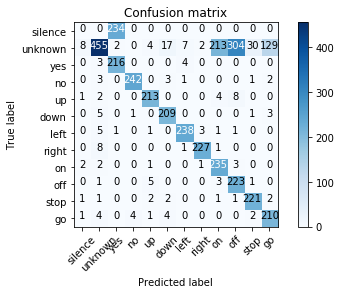

In [65]:
plot_confusion_matrix(cm, commands)

In [66]:
commands = ["silence", "unknown"]
commands.extend("yes no up down left right on off stop go".split(" "))

In [92]:
label = 11

In [93]:
df11 = df[(df[0]==label) & (df[1]==label)]
df11 = df11.iloc[:,-45:]
#dfc = df11.iloc[:,-45:]
dfcm = df11.as_matrix()
mdfcm = dfcm.mean(axis=0)

In [94]:
#prec
df01 = df[(df[1]==label)]
print((df01[0]==label).mean())
df01 = df01.iloc[:,-45:]

0.606936416185


In [95]:
#recall
df10 = df[(df[0]==label)]
print((df10[1]==label).mean())
df10 = df10.iloc[:,-45:]

0.929203539823


(array([  1.,   3.,   5.,  11.,  10.,   5.,  11.,  17.,  18.,  22.,  13.,
         13.,  16.,  11.,  10.,   8.,   9.,   7.,   8.,   1.,   4.,   3.,
          1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([ 0.57601529,  0.63929964,  0.70258398,  0.76586832,  0.82915267,
         0.89243701,  0.95572136,  1.0190057 ,  1.08229005,  1.14557439,
         1.20885874,  1.27214308,  1.33542742,  1.39871177,  1.46199611,
         1.52528046,  1.5885648 ,  1.65184915,  1.71513349,  1.77841784,
         1.84170218,  1.90498652,  1.96827087,  2.03155521,  2.09483956,
         2.1581239 ,  2.22140825,  2.28469259,  2.34797693,  2.41126128,
         2.47454562]),
 <a list of 30 Patch objects>)

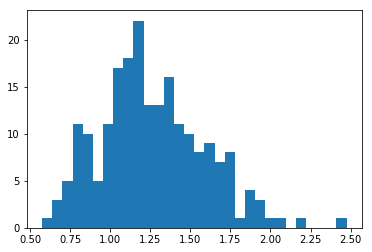

In [96]:
dist = np.linalg.norm(df11.as_matrix()-mdfcm, axis=1)
plt.hist(dist,30)

(array([  1.,   3.,   6.,  11.,  10.,   6.,  12.,  19.,  20.,  21.,  17.,
         22.,  24.,  14.,  18.,  17.,  16.,  30.,  21.,  20.,  13.,   7.,
          8.,   4.,   2.,   1.,   0.,   0.,   1.,   2.]),
 array([ 0.57601529,  0.64065039,  0.70528549,  0.76992059,  0.83455569,
         0.89919079,  0.96382589,  1.02846099,  1.09309609,  1.15773119,
         1.22236629,  1.28700139,  1.35163649,  1.41627159,  1.48090669,
         1.54554179,  1.61017689,  1.67481199,  1.73944709,  1.80408219,
         1.8687173 ,  1.9333524 ,  1.9979875 ,  2.0626226 ,  2.1272577 ,
         2.1918928 ,  2.2565279 ,  2.321163  ,  2.3857981 ,  2.4504332 ,
         2.5150683 ]),
 <a list of 30 Patch objects>)

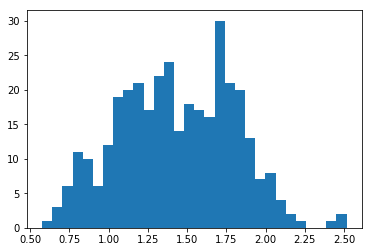

In [97]:
dist2 = np.linalg.norm(df01.as_matrix()-mdfcm, axis=1)
plt.hist(dist2,30)

In [27]:
import libmr 
tailsize = 20
mr = libmr.MR()
tailtofit = sorted(dist)[-tailsize:]
mr.fit_high(tailtofit, len(tailtofit))

In [98]:
for i in range(10,50):
    i = i/10
    print( (dist<i).mean(), (dist<i).sum()/(dist2<i).sum())

0.2 0.976744186047
0.314285714286 0.95652173913
0.47619047619 0.952380952381
0.590476190476 0.939393939394
0.690476190476 0.868263473054
0.77619047619 0.835897435897
0.833333333333 0.813953488372
0.9 0.771428571429
0.942857142857 0.6875
0.966666666667 0.640378548896
0.980952380952 0.628048780488
0.990476190476 0.613569321534
0.995238095238 0.609329446064
0.995238095238 0.609329446064
0.995238095238 0.607558139535
1.0 0.608695652174
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185
1.0 0.606936416185


In [130]:
np.concatenate([dist,dist2])

array([ 1.44061199,  1.7922003 ,  1.87160917, ...,  3.72106607,
        2.44856805,  1.92109347])

In [129]:
dist2

array([ 1.62174288,  2.42904699,  2.19173379,  1.80328724,  1.64995967,
        2.42983895,  2.01329557,  2.45597934,  2.01298987,  3.52828113,
        2.30264   ,  3.10156767,  3.53448467,  3.52213239,  2.17075536,
        3.64925465,  3.03056187,  3.58288326,  3.30535603,  2.67320859,
        2.56460935,  2.00405322,  3.59800859,  2.34439331,  2.16097441,
        2.09756655,  3.78163901,  1.64713447,  3.51569759,  1.63662039,
        2.18434495,  3.81669567,  2.08795927,  1.74799327,  2.80190933,
        2.71824926,  2.12423263,  3.21591469,  1.81993972,  1.63512646,
        1.65541896,  1.65764157,  2.07090996,  3.08572599,  3.60272253,
        3.81715375,  1.82143998,  1.92955582,  2.54108852,  1.66949956,
        2.28178504,  3.22985123,  1.8753304 ,  3.66835501,  1.50805144,
        1.83008413,  2.63940098,  2.18981362,  2.60930413,  2.53859973,
        4.12738701,  3.80487412,  2.38338959,  3.66660154,  1.77891773,
        3.69932329,  2.29331033,  3.4841127 ,  2.70302057,  2.17